In [1]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os
import statsmodels.api as sm

## Data processing

In [2]:
data = pyreadr.read_r('song_data.rds') 
data = data[None]
data['release_year'] = pd.to_datetime(data['release_date']).dt.year

In [3]:
data_genres_composition = data.where(data['release_year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]))
data_genres_composition = data_genres_composition.dropna(how='all')
data_genres_composition = data_genres_composition.groupby(['release_year', 'tag']).size().unstack().reset_index()
visu_data = data_genres_composition.copy()
data_genres_composition['sum'] = data_genres_composition['folk'] + data_genres_composition['hiphop'] + data_genres_composition['pop'] + data_genres_composition['rock']
data_genres_composition['folk_prop'] = data_genres_composition['folk'] / data_genres_composition['sum']
data_genres_composition['hiphop_prop'] = data_genres_composition['hiphop'] / data_genres_composition['sum']
data_genres_composition['pop_prop'] = data_genres_composition['pop'] / data_genres_composition['sum']
data_genres_composition['rock_prop'] = data_genres_composition['rock'] / data_genres_composition['sum']
display(data_genres_composition)

tag,release_year,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop
0,2009.0,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923
1,2010.0,140,137,1079,227,1583,0.088440,0.086545,0.681617,0.143399
2,2011.0,279,113,1023,415,1830,0.152459,0.061749,0.559016,0.226776
3,2012.0,289,271,1251,473,2284,0.126532,0.118651,0.547723,0.207093
4,2013.0,438,314,1660,564,2976,0.147177,0.105511,0.557796,0.189516
5,2014.0,802,804,2432,1211,5249,0.152791,0.153172,0.463326,0.230711
6,2015.0,1297,918,2882,1687,6784,0.191185,0.135318,0.424823,0.248673
7,2016.0,1072,849,3908,1447,7276,0.147334,0.116685,0.537108,0.198873
8,2017.0,1775,2365,6497,2203,12840,0.138240,0.184190,0.505997,0.171573
9,2018.0,1902,3636,9687,1940,17165,0.110807,0.211826,0.564346,0.113021


In [4]:
data_genres_composition_GTZAN = data.where(data['release_year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]) & (data['tag'] != "folk"))
data_genres_composition_GTZAN = data_genres_composition_GTZAN.dropna(how='all')
data_genres_composition_GTZAN = data_genres_composition_GTZAN.groupby(['release_year', 'tag']).size().unstack().reset_index()

data_genres_composition_GTZAN['sum'] = data_genres_composition_GTZAN['hiphop'] + data_genres_composition_GTZAN['pop'] + data_genres_composition_GTZAN['rock']
data_genres_composition_GTZAN['hiphop_prop_GTZAN'] = data_genres_composition_GTZAN['hiphop'] / data_genres_composition_GTZAN['sum']
data_genres_composition_GTZAN['pop_prop_GTZAN'] = data_genres_composition_GTZAN['pop'] / data_genres_composition_GTZAN['sum']
data_genres_composition_GTZAN['rock_prop_GTZAN'] = data_genres_composition_GTZAN['rock'] / data_genres_composition_GTZAN['sum']

data_genres_composition_GTZAN = data_genres_composition_GTZAN.reset_index().loc[:, ['release_year', 'hiphop_prop_GTZAN', 'pop_prop_GTZAN', 'rock_prop_GTZAN']]
print(data_genres_composition_GTZAN)

tag  release_year  hiphop_prop_GTZAN  pop_prop_GTZAN  rock_prop_GTZAN
0          2009.0           0.044226        0.788698         0.167076
1          2010.0           0.094941        0.747748         0.157311
2          2011.0           0.072856        0.659574         0.267569
3          2012.0           0.135840        0.627068         0.237093
4          2013.0           0.123719        0.654058         0.222222
5          2014.0           0.180796        0.546886         0.272318
6          2015.0           0.167305        0.525241         0.307454
7          2016.0           0.136847        0.629916         0.233237
8          2017.0           0.213737        0.587167         0.199096
9          2018.0           0.238223        0.634672         0.127105
10         2019.0           0.258040        0.600088         0.141873


In [5]:
# Load metrics data
dir_name = 'pickles'
filenames = [os.path.join(dir_name,filename) for filename in os.listdir(dir_name) if "_metrics_" in filename]
read_list = [pd.read_pickle(filename) for filename in filenames]
merge = pd.concat(read_list, keys=[filename.split('/')[-1].replace('.pkl', '') for filename in filenames], names=['src']).reset_index()

In [6]:
display(merge)

,src,level_1,release_year,treatment_year,metrics,values
0,rf_metrics_2009,0,2009,0,rf_pred_acc,0.946352
1,rf_metrics_2009,1,2010,0,rf_pred_acc,0.668351
2,rf_metrics_2009,2,2011,0,rf_pred_acc,0.571038
3,rf_metrics_2009,3,2012,0,rf_pred_acc,0.580560
4,rf_metrics_2009,4,2013,0,rf_pred_acc,0.558132
...,...,...,...,...,...,...
655,knn_metrics_2009,39,2015,0,knn_precision,NaN
656,knn_metrics_2009,40,2016,0,knn_precision,NaN
657,knn_metrics_2009,41,2017,1,knn_precision,NaN
658,knn_metrics_2009,42,2018,1,knn_precision,NaN


In [7]:
merge = (
    merge
    .assign(classifier=lambda x: x['src'].str.extract(r'(^[a-z]{2,})_.*$'),
            data=lambda x: x['src'].str.extract(r'^.*_metrics_(.*)$'))
    .merge(data_genres_composition, on='release_year', how='right')
    .merge(data_genres_composition_GTZAN, on='release_year', how='right')
)
display(merge)

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
0,rf_metrics_2009,0,2009,0,rf_pred_acc,0.946352,rf,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
1,rf_metrics_2009,11,2009,0,rf_pred_bin_acc,0.992847,rf,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
2,rf_metrics_2009,22,2009,0,rf_recall,0.851852,rf,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
3,rf_metrics_2009,33,2009,0,rf_precision,0.958333,rf,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
4,knn_metrics_gtzan,0,2009,0,knn_pred_acc,0.160524,knn,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,gnb_metrics_2009,43,2019,1,gnb_precision,0.499048,gnb,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
656,knn_metrics_2009,10,2019,1,knn_pred_acc,0.545210,knn,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
657,knn_metrics_2009,21,2019,1,knn_pred_bin_acc,0.765087,knn,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
658,knn_metrics_2009,32,2019,1,knn_recall,0.000000,knn,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


In [8]:
# filtered_data = merge[
#     (merge['release_year'] != 2009) &
#     (merge['metrics'].str.contains('mean_pred_bin_acc|recall')) &
#     (~merge['metrics'].str.contains('trap'))
# ]
# display(filtered_data)
# # filtered_data = filtered_data.groupby(['src', 'metrics']).size().unstack().reset_index()
# # display(filtered_data)

# res = sm.OLS(filtered_data['values'], sm.add_constant(filtered_data[['release_year', 'values']])).fit()

# result = pd.DataFrame({
#     'est_year':   [res.params[1]],
#     'sd_year':    [res.bse[1]],
#     'pval_year':  [res.pvalues[1]],
#     'est_year2':  [res.params[2]],
#     'sd_year2':   [res.bse[2]],
#     'pval_year2': [res.pvalues[2]],
#     'r2':         [res.rsquared]
#     })

# result = result.reset_index().loc[:, ['pval_year', 'pval_year2']]

# display(result)

## Visualize: Mean Prediction Hip-Hop Binary & Recall

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
1,rf_metrics_2009,11,2009,0,rf_pred_bin_acc,0.992847,rf,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
5,knn_metrics_gtzan,11,2009,0,knn_pred_bin_acc,0.090090,knn,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
9,classifiers_metrics_gtzan,11,2009,0,classifiers_pred_bin_acc,0.281941,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
13,gnb_metrics_2018,11,2009,1,gnb_pred_bin_acc,0.157368,gnb,2018,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
17,gnb_metrics_gtzan,11,2009,0,gnb_pred_bin_acc,0.811630,gnb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,classifiers_metrics_2018,21,2019,0,classifiers_pred_bin_acc,0.256772,classifiers,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
645,rf_metrics_2018,21,2019,0,rf_pred_bin_acc,0.377913,rf,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
649,knn_metrics_2018,21,2019,0,knn_pred_bin_acc,0.380601,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
653,gnb_metrics_2009,21,2019,1,gnb_pred_bin_acc,0.764987,gnb,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


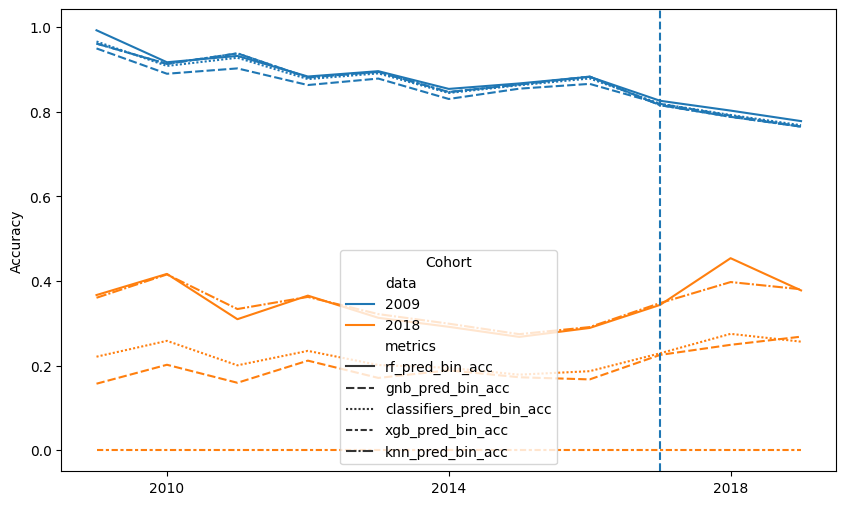

In [10]:
plot_accuracy = merge[merge['metrics'].str.contains("pred_bin") == True]

display(plot_accuracy)
plot_accuracy = plot_accuracy[plot_accuracy['data'].isin(["2009","2018","GTZAN"])]

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_accuracy, x='release_year', y='values', hue='data', style='metrics')
plt.axvline(x=2017, linestyle='dashed')
plt.xlabel('')
plt.ylabel('Accuracy')
plt.xticks(range(2010, 2019, 4))
plt.legend(title='Cohort', loc='lower center')
plt.show()

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
2,rf_metrics_2009,22,2009,0,rf_recall,0.851852,rf,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
14,gnb_metrics_2018,22,2009,1,gnb_recall,0.703704,gnb,2018,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
22,classifiers_metrics_2009,22,2009,0,classifiers_recall,0.300926,classifiers,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
26,xgb_metrics_2009,22,2009,0,xgb_recall,0.000000,xgb,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
34,xgb_metrics_2018,22,2009,1,xgb_recall,0.000000,xgb,2018,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,classifiers_metrics_2018,32,2019,0,classifiers_recall,0.564222,classifiers,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
646,rf_metrics_2018,32,2019,0,rf_recall,0.782535,rf,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
650,knn_metrics_2018,32,2019,0,knn_recall,0.729546,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
654,gnb_metrics_2009,32,2019,1,gnb_recall,0.111064,gnb,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


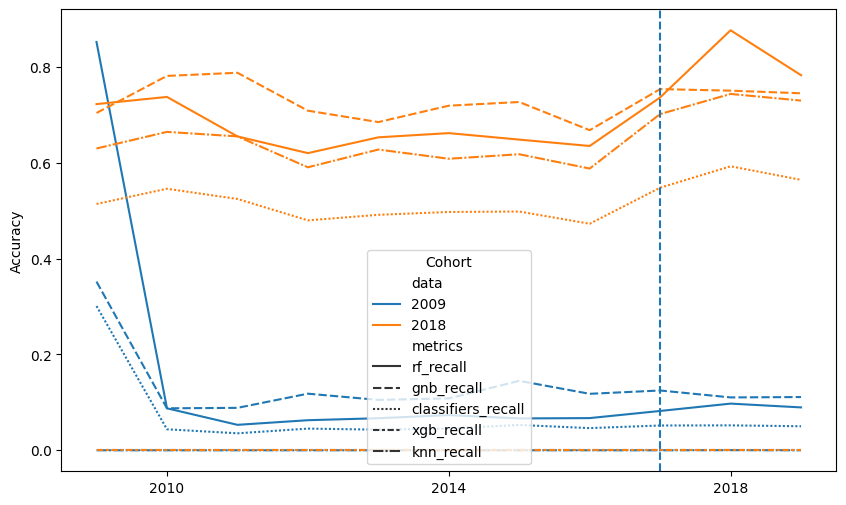

In [11]:
plot_recall = merge[merge['metrics'].str.contains("recall") == True]
plot_recall = plot_recall[plot_recall['data'].isin(["2009","2018","GTZAN"])]
display(plot_recall)

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_recall, x='release_year', y='values', hue='data', style='metrics')
plt.axvline(x=2017, linestyle='dashed')
plt.xlabel('')
plt.ylabel('Accuracy')
plt.xticks(range(2010, 2019, 4))
plt.legend(title='Cohort', loc='lower center')
plt.show()